# Introdução ao processo de aprendizado de máquina com Python

### Prof. Hugo de Paula

Apresentação das características básicas do Colab.


Baseado no livro: Andreas C. Müller, Sarah Guido (2016) Introduction to Machine Learning with Python: A Guide for Data Scientists 1st Edition

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).



## Importação das bibliotecas

A primeira etapa do processo consiste na importação das bibliotecas.

O Scikit-Learn (`sklearn`) consiste em um framework para aprendizado de máquina clássico.

  - `sklearn.datasets`: contém um conjunto de bases de dados padrão utilizadas para treinamento em Machine Learning.
  - `sklearn.model_selection`: ferramentas para seleção e ajuste de modelos. Otimização de hiperparâmetros.
  - `sklearn.neighbors`:  modelos baseados em vizinhança.

Bibliotecas acessórias envolvem manipulação de dados, manipulação numérica e visualização de dados.

  - `numpy`: biblioteca clássica para manipulação numérica
  - `pandas`: biblioteca para manipulação de datasets. Um `DataFrame` é a estrutura de dados base da biblioteca Pandas e permite a manipulação de datasets como tabelas de dados.
  - `matplotlib` e `seaborn`: bibliotecas para visualização de dados.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


## Carregamento da base de dados

No Scikit-Learn, os datasets são representados como objetos `Bunch`. Esses objetos extendem os tipos `Dictionary` tradicionais e permitem acessar as colunas das tabelas como chaves.

### Notação matemática

Em geral, na Matemática, variáveis escalares (com um valor) são representadas por letras minúsculas e vetores são representados por letras maiúsculas. Por isso, em Machine Learning, o padrão é utilizarmos a seguinte notação:

 - `X`: representa os vetores dos atributos, uma vez que cada regristro é descrito por seu _feature vector_.
 - `y`: representa o atributo alvo (target ou label), uma vez que o alvo é escalar.

Então o objetivo de um algoritmo de machine learning é induzir uma função 

    y = h(X) 

que represente eficientemente a função desconhecida:

    y = f(X)

In [ ]:
iris = load_iris()
X = iris['data']
y = iris['target']


## Explorando dados

Descrevendo os dados do dataset Iris.

Os comandos a seguir apresentam os atributos do tipo `Bunch` e como eles podem ser utilizados para se obter um conhecimento básico do seu dataset.

In [ ]:
print("\nCampos to dataset Iris ({0}):\n{1}\n"
          .format("iris.keys()", iris.keys()))

print("\nParte da descrição do dataset Iris ({0}):\n{1}\n"
          .format("iris['DESCR'][:471]", iris['DESCR'][:491]))

print("\nNomes das classes ({0}):\n{1}\n"
          .format("iris['target_names']", iris['target_names']))

print("\nNomes das features ({0}):\n{1}\n"
          .format("iris['feature_names']", iris['feature_names']))



Campos to dataset Iris (iris.keys()):
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Parte da descrição do dataset Iris (iris['DESCR'][:471]):
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iri


Nomes das classes (iris['target_names']):
['setosa' 'versicolor' 'virginica']


Nomes das features (iris['feature_names']):
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']



### Divisão da base original em base de testes e base de treinamento.

Uma das tarefas base do processo de Machine Lerning é o particionamento do dataset em base de treinamento e base de testes.

Por padrão, a função `train_test_slipt` particiona a base reservando 75% dos exemplos para treinamento e 25% para testes. Mas esses valores podem ser especificado na passagem da função.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

print("\nBase de treinamento ({0}):\n{1}\n".format("X_train.shape", X_train.shape))

print("\nBase de teste ({0}):\n{1}\n".format("X_test.shape", X_test.shape))



Base de treinamento (X_train.shape):
(112, 4)


Base de teste (X_test.shape):
(38, 4)



## Visualização de dados

Neste exemplo, a biblioteca Pandas é utilizada para exibir os dados carregados.

`DataFrame` é descrito como uma estrutura para armazenamento e manipulação de dados tabulares bidimensionais potencialmente heterogêneos.



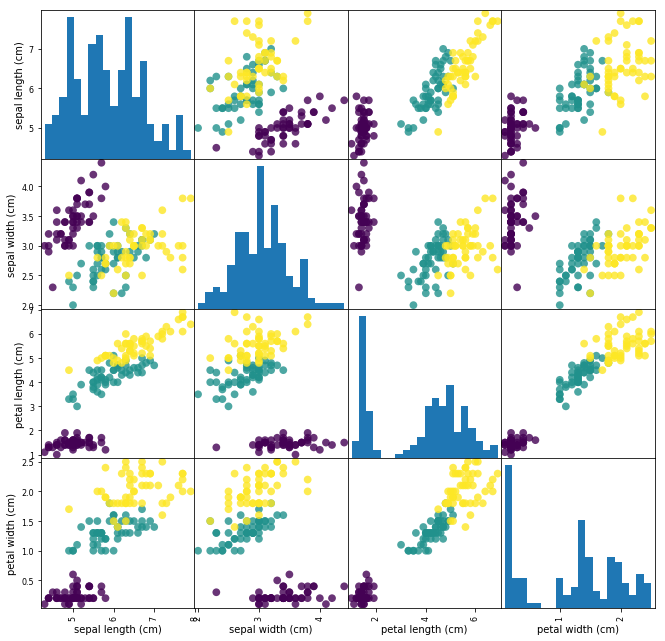

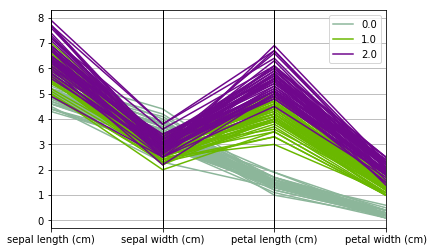

In [ ]:
iris_dataframe = pd.DataFrame(np.c_[iris['data'], iris['target']],
					columns=np.append(iris['feature_names'], 'target'))

ax2 = pd.plotting.scatter_matrix(iris_dataframe.iloc[:,:4], figsize=(11, 11), c=y, marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)

plt.figure()
ax3 = pd.plotting.parallel_coordinates(iris_dataframe, "target")
